In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Customer Attrition Status.csv')
df2 = pd.read_csv('Customer Demographics.csv')
df3 = pd.read_csv('Customer Investment Snapshot.csv')
df4 = pd.read_csv('Customer Portfolio Snapshot.csv')

In [3]:
df = pd.merge(df1, df2, on = ['RowNumber', 'CustomerId'], how = 'left')
df = pd.merge(df, df3, on = ['RowNumber', 'CustomerId'], how = 'left')
df = pd.merge(df, df4, on = ['RowNumber', 'CustomerId'], how = 'left')
df = df[['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasChckng', 'IsActiveMember', 'EstimatedSalary', 'Exited' ]]

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,West,Female,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1.0
1,2,15647311.0,Hill,608.0,Central,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304.0,Onio,502.0,West,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354.0,Boni,699.0,West,Female,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0.0
4,5,15737888.0,Mitchell,850.0,Central,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [5]:
df.shape

(10021, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
count,10021.000000,1.000200e+04,9999.00000,10002.000000,10002.000000,6385.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,5009.530785,1.569097e+07,650.50075,38.943711,5.014797,119841.627383,1.530494,0.705359,0.514997,100105.624356,0.203859
std,2892.282521,7.195055e+04,96.69932,10.612675,2.902953,30100.935329,0.581967,0.455904,0.499800,57515.031841,0.402886
min,1.000000,1.556570e+07,305.00000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2506.000000,1.562854e+07,584.00000,32.000000,3.000000,100194.440000,1.000000,0.000000,0.000000,51012.472500,0.000000
50%,5009.000000,1.569074e+07,652.00000,37.000000,5.000000,119852.010000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,7514.000000,1.575331e+07,717.50000,44.000000,7.000000,139529.930000,2.000000,1.000000,1.000000,149400.922500,0.000000
max,10019.000000,1.581569e+07,865.00000,190.000000,30.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
df.dtypes

RowNumber            int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasChckng          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [8]:
df.isnull().sum()

RowNumber             0
CustomerId           19
Surname              19
CreditScore          22
Geography            19
Gender               19
Age                  19
Tenure               19
Balance            3636
NumOfProducts        19
HasChckng            19
IsActiveMember       19
EstimatedSalary      19
Exited               19
dtype: int64

In [9]:
missing_column = ['Balance']
for i in missing_column:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

In [10]:
df.isnull().sum()

RowNumber           0
CustomerId         19
Surname            19
CreditScore        22
Geography          19
Gender             19
Age                19
Tenure             19
Balance             0
NumOfProducts      19
HasChckng          19
IsActiveMember     19
EstimatedSalary    19
Exited             19
dtype: int64

In [11]:
missing_column = ['CreditScore']
for i in missing_column:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

In [12]:
df.isnull().sum()

RowNumber           0
CustomerId         19
Surname            19
CreditScore         0
Geography          19
Gender             19
Age                19
Tenure             19
Balance             0
NumOfProducts      19
HasChckng          19
IsActiveMember     19
EstimatedSalary    19
Exited             19
dtype: int64

In [13]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,West,Female,42.0,2.0,119841.627383,1.0,1.0,1.0,101348.88,1.0
1,2,15647311.0,Hill,608.0,Central,Female,41.0,1.0,83807.860000,1.0,0.0,1.0,112542.58,0.0
2,3,15619304.0,Onio,502.0,West,Female,42.0,8.0,159660.800000,3.0,1.0,0.0,113931.57,1.0
3,4,15701354.0,Boni,699.0,West,Female,39.0,1.0,119841.627383,2.0,0.0,0.0,93826.63,0.0
4,5,15737888.0,Mitchell,850.0,Central,Female,43.0,2.0,125510.820000,1.0,1.0,1.0,79084.10,0.0


In [16]:
df.shape

(10002, 14)

In [17]:
df.to_csv('Customer_Churn_Analysis_Cleaned.csv', index = False)

In [18]:
df.Exited.value_counts()

0.0    7963
1.0    2039
Name: Exited, dtype: int64

In [19]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,619.0,West,Female,42.0,2.0,119841.627383,1.0,1.0,1.0,101348.88,1.0
1,608.0,Central,Female,41.0,1.0,83807.860000,1.0,0.0,1.0,112542.58,0.0
2,502.0,West,Female,42.0,8.0,159660.800000,3.0,1.0,0.0,113931.57,1.0
3,699.0,West,Female,39.0,1.0,119841.627383,2.0,0.0,0.0,93826.63,0.0
4,850.0,Central,Female,43.0,2.0,125510.820000,1.0,1.0,1.0,79084.10,0.0


In [21]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                       mean count
Geography Gender                 
Central   Female   0.211060  1085
          Male     0.130497  1387
          Neutral  0.600000     5
East      Female   0.375524  1193
          Male     0.278664  1317
          Neutral  1.000000     1
West      Female   0.203450  2261
          Male     0.127226  2751
          Neutral  0.000000     2

Text(0.5, 1.0, 'Exited Counts with respect to Gender')

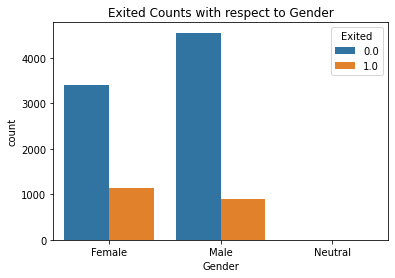

In [22]:
a = sns.countplot(x = 'Gender', data=df, hue = 'Exited')
a.set_title('Exited Counts with respect to Gender')

Text(0.5, 1.0, 'Exited counts with respect to Geography')

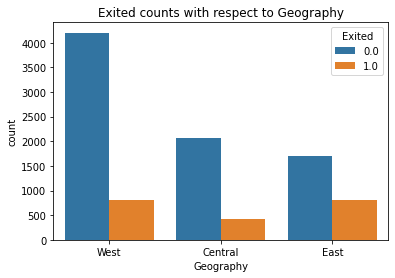

In [23]:
b = sns.countplot(x = 'Geography', data=df, hue = 'Exited')
b.set_title('Exited counts with respect to Geography')

Text(0.5, 1.0, 'No of Active Members')

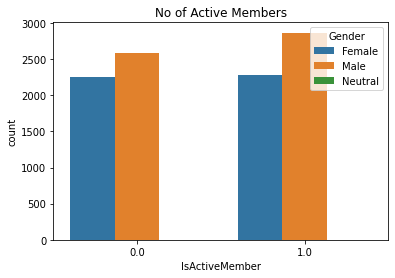

In [24]:
c = sns.countplot(x = 'IsActiveMember', data=df, hue = 'Gender')
c.set_title("No of Active Members")

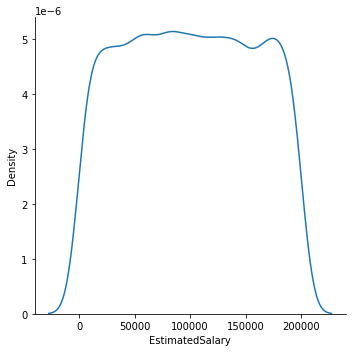

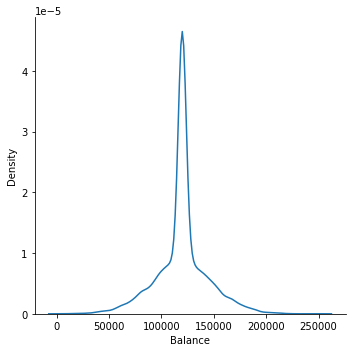

In [25]:
sns.displot(df, x="EstimatedSalary", kind = 'kde')
sns.displot(df, x="Balance", kind = 'kde')

In [26]:
df.HasChckng.value_counts()

1.0    7055
0.0    2947
Name: HasChckng, dtype: int64

In [27]:
df[['Exited','HasChckng']].groupby('Exited').count()

,HasChckng
Exited,
0.0,7963
1.0,2039


Text(0.5, 1.0, 'Exited counts with respect to DepositAccount')

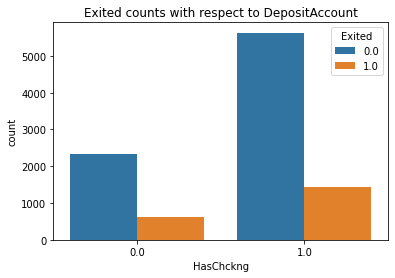

In [28]:
f = sns.countplot(x = 'HasChckng', data=df, hue = 'Exited')
f.set_title('Exited counts with respect to DepositAccount')

In [29]:
df[['Age','Exited']].groupby('Exited').mean()

,Age
Exited,
0.0,37.435640
1.0,44.833252


<AxesSubplot:>

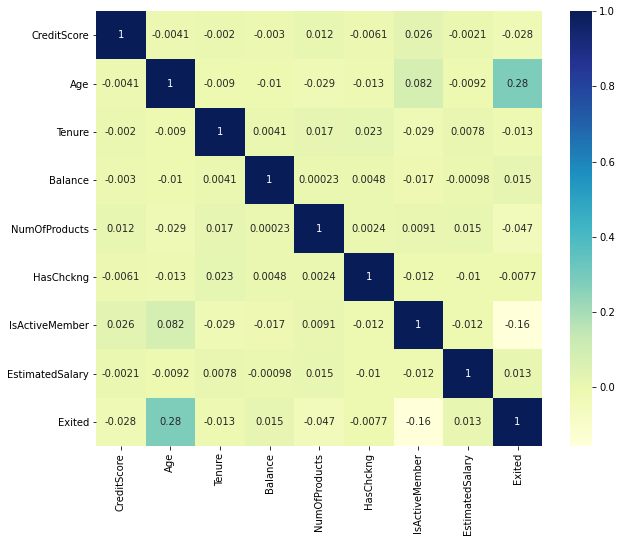

In [30]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='YlGnBu', annot=True)

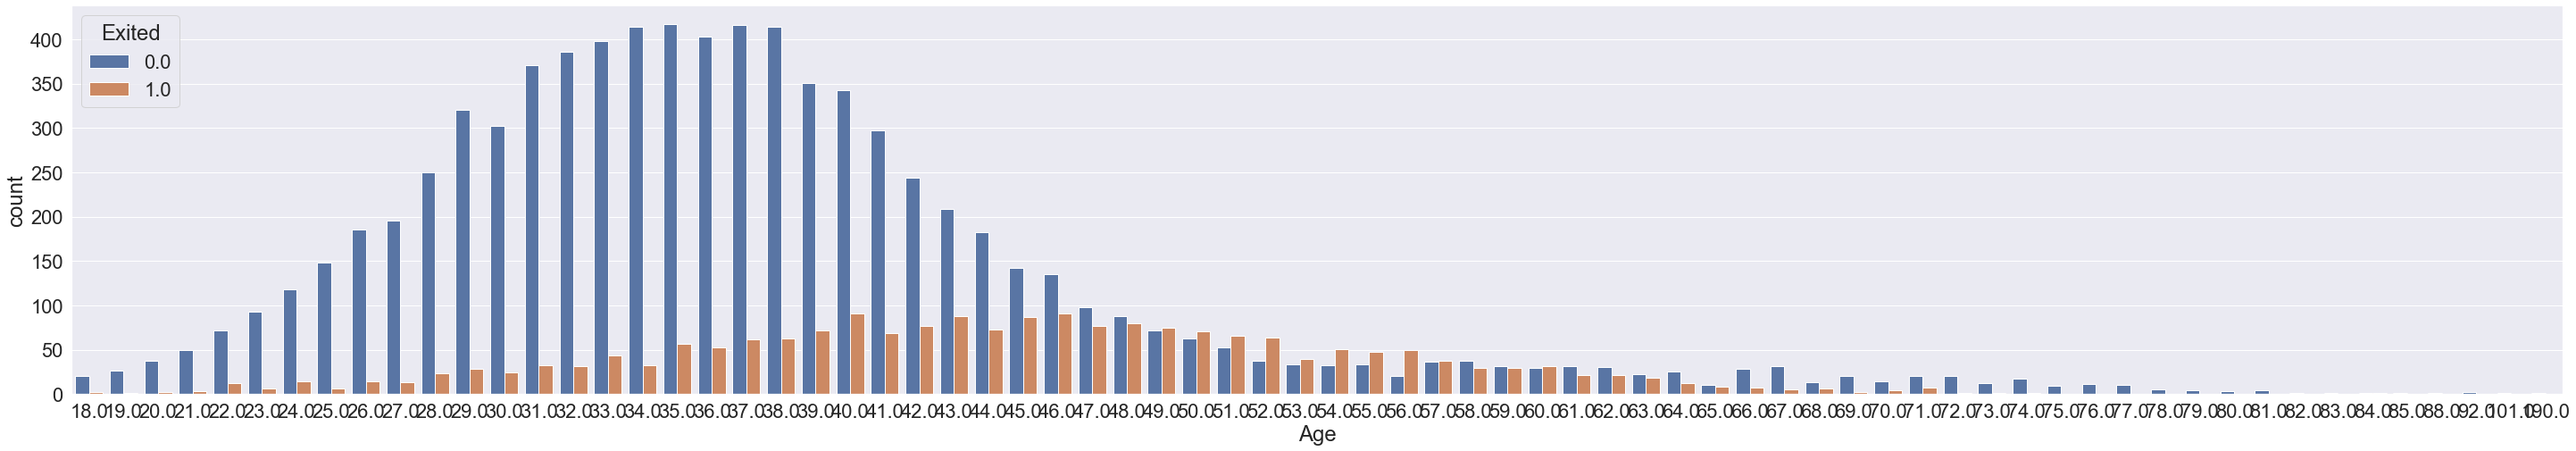

In [31]:
plt.figure(figsize=(50,8))
sns.set(font_scale = 2)
g = sns.countplot(x = 'Age', data=df, hue = 'Exited')